<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 9 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Produisez une étude de marché </h2>
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.1 - Importation des librairies</h3>
</div>

In [1]:
# Importation des données
import pandas as pd    
import numpy as np

# Visualisation 
import matplotlib.pyplot as plt
import seaborn as sns

# Préparation de données
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn import datasets
from scipy import stats

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">1.2 - Chargement des fichiers Excel</h3>
</div>

In [2]:
# Importer les fichiers

dispo_alim_2017 = pd.read_csv("DisponibiliteAlimentaire_2017.csv")
pop_2000_2018 = pd.read_csv("Population_2000_2018.csv")
PIB = pd.read_csv("PIB.csv")

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyses des fichiers </h2>
</div>

<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier Dispo_alimentaire_2017</h3>
</div>

In [3]:
print('Nombre de lignes', dispo_alim_2017.shape[0])
print('Nombre de colonnes', dispo_alim_2017.shape[1])

Nombre de lignes 176600
Nombre de colonnes 14


In [4]:
# Regarder les doublons 
dispo_alim_2017.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
176595    False
176596    False
176597    False
176598    False
176599    False
Length: 176600, dtype: bool

In [5]:
# Regarder ou il y a un doublon
dispo_alim_2017[dispo_alim_2017.duplicated() == True]

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole


Il n'y a pas de doublons dans le fichier dispo_alim_2017

In [6]:
# Regarder s'il y a des valeurs manquantes
dispo_alim_2017.isnull().sum()

Code Domaine              0
Domaine                   0
Code zone                 0
Zone                      0
Code Élément              0
Élément                   0
Code Produit              0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64

Il n'y a pas de valeurs manquantes dans le fichier dispo_alim_2017

In [7]:
dispo_alim_2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [8]:
dispo_alim_2017.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.0,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.0,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.0,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.0,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.0,S,Données standardisées


In [9]:
# Convertir les Milliers de tonnes en kg
dispo_alim_2017.loc[dispo_alim_2017['Unité'] == 'Milliers de tonnes', 'Valeur'] = dispo_alim_2017.loc[dispo_alim_2017['Unité'] == 'Milliers de tonnes', 'Valeur'] * 1000000

# Convertir les tonnes en kg
dispo_alim_2017.loc[dispo_alim_2017['Unité'] == 'Tonnes', 'Valeur'] = dispo_alim_2017.loc[dispo_alim_2017['Unité'] == 'Tonnes', 'Valeur'] * 1000

# Assurer que toutes les unités sont maintenant en kg
dispo_alim_2017['Unité'] = 'kg'

In [10]:
# Créer une liste des colonnes importantes
liste_de_colonnes_imp = ['Zone', 'Élément', 'Année', 'Produit', 'Valeur', 'Unité']
dispo_alim_2017 = dispo_alim_2017[liste_de_colonnes_imp]

In [11]:
# Créer une nouvelle colonne kg 

# Créer de nouvelles colonnes pour chaque unité et y placer les valeurs correspondantes
dispo_alim_2017['Valeur_kg'] = dispo_alim_2017.loc[dispo_alim_2017['Unité'] == 'kg', 'Valeur']
dispo_alim_2017['Valeur_Kcal_par_personne_par_jour'] = dispo_alim_2017.loc[dispo_alim_2017['Unité'] == 'Kcal/personne/jour', 'Valeur']
dispo_alim_2017['Valeur_g_par_personne_par_jour'] = dispo_alim_2017.loc[dispo_alim_2017['Unité'] == 'g/personne/jour', 'Valeur']

In [12]:
# Supprimer les colonnes 'Valeur_Kcal_par_personne_par_jour' et 'Valeur_g_par_personne_par_jour' qui ne seront pas utiles.
dispo_alim_2017.drop(['Valeur_Kcal_par_personne_par_jour', 'Valeur_g_par_personne_par_jour', 'Unité', 'Valeur'], axis=1, inplace=True)

In [13]:
# Renommer la colonne en kg
dispo_alim_2017.rename(columns={'Valeur_kg': 'kg'}, inplace=True)

In [14]:
# Créer de nouvelles colonnes pour chaque élément et y placer les valeurs correspondantes
dispo_alim_2017['Production'] = dispo_alim_2017.loc[dispo_alim_2017['Élément'] == 'Production', 'kg']
dispo_alim_2017['Importations - Quantité'] = dispo_alim_2017.loc[dispo_alim_2017['Élément'] == 'Importations - Quantité', 'kg']
dispo_alim_2017['Exportations - Quantité'] = dispo_alim_2017.loc[dispo_alim_2017['Élément'] == 'Exportations - Quantité', 'kg']
dispo_alim_2017['Disponibilité intérieure'] = dispo_alim_2017.loc[dispo_alim_2017['Élément'] == 'Disponibilité intérieure', 'kg']
dispo_alim_2017['Disponibilité alimentaire en quantité (kg/personne/an)'] = dispo_alim_2017.loc[dispo_alim_2017['Élément'] == 'Disponibilité alimentaire en quantité (kg/personne/an)', 'kg']

In [15]:
# Supprimer la colonne Element
dispo_alim_2017.drop(columns={'Élément'}, inplace=True)

In [16]:
# Renommer la colonne dispo alimentaire en conso moyenne 
dispo_alim_2017.rename(columns={'Disponibilité alimentaire en quantité (kg/personne/an)': 'Conso moyenne (kg/personne/an)'}, inplace=True)

In [17]:
dispo_alim_2017.rename(columns={'Disponibilité intérieure': 'Quantité Totale Poulet Dispo'}, inplace=True)

In [18]:
dispo_alim_2017

,Zone,Année,Produit,kg,Production,Importations - Quantité,Exportations - Quantité,Quantité Totale Poulet Dispo,Conso moyenne (kg/personne/an)
0,Afghanistan,2017,Blé et produits,4.281000e+09,4.281000e+09,NaN,NaN,NaN,NaN
1,Afghanistan,2017,Blé et produits,2.302000e+09,NaN,2.302000e+09,NaN,NaN,NaN
2,Afghanistan,2017,Blé et produits,-1.190000e+08,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,2017,Blé et produits,0.000000e+00,NaN,NaN,0.0,NaN,NaN
4,Afghanistan,2017,Blé et produits,6.701000e+09,NaN,NaN,NaN,6.701000e+09,NaN
...,...,...,...,...,...,...,...,...,...
176595,Zimbabwe,2017,Miscellanees,1.900000e+07,NaN,NaN,NaN,NaN,NaN
176596,Zimbabwe,2017,Miscellanees,1.330000e+00,NaN,NaN,NaN,NaN,1.33
176597,Zimbabwe,2017,Miscellanees,1.000000e+00,NaN,NaN,NaN,NaN,NaN
176598,Zimbabwe,2017,Miscellanees,4.000000e-02,NaN,NaN,NaN,NaN,NaN


In [19]:
# Filtrer le df sur Viande de volailles qui correspond au poulet 
dispo_alim_2017 = dispo_alim_2017[dispo_alim_2017['Produit'] == 'Viande de Volailles' ]

In [20]:
# Supprimer la variable Produit (Il y a que de la viande de volailles)
dispo_alim_2017.drop(columns={'Produit'}, inplace=True)

C:\Users\33621\AppData\Local\Temp\ipykernel_2368\201938950.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dispo_alim_2017.drop(columns={'Produit'}, inplace=True)


In [21]:
# Regrouper par pays et année, puis sommer les valeurs pour chaque colonne 
dispo_alim_2017 = dispo_alim_2017.groupby(['Zone', 'Année']).sum().reset_index()

# Afficher le résultat
dispo_alim_2017

,Zone,Année,kg,Production,Importations - Quantité,Exportations - Quantité,Quantité Totale Poulet Dispo,Conso moyenne (kg/personne/an)
0,Afghanistan,2017,1.710000e+08,2.800000e+07,29000000.0,0.000000e+00,5.700000e+07,1.53
1,Afrique du Sud,2017,6.480000e+09,1.667000e+09,514000000.0,6.300000e+07,2.118000e+09,35.69
2,Albanie,2017,1.490001e+08,1.300000e+07,38000000.0,0.000000e+00,4.700000e+07,16.36
3,Algérie,2017,8.310000e+08,2.750000e+08,2000000.0,0.000000e+00,2.770000e+08,6.38
4,Allemagne,2017,6.450000e+09,1.514000e+09,842000000.0,6.460000e+08,1.739000e+09,19.47
...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,2017,1.373000e+09,4.800000e+07,433000000.0,9.400000e+07,4.120000e+08,43.47
168,Équateur,2017,1.021000e+09,3.400000e+08,0.0,0.000000e+00,3.410000e+08,19.31
169,États-Unis d'Amérique,2017,6.234100e+10,2.191400e+10,123000000.0,3.692000e+09,1.826600e+10,55.68
170,Éthiopie,2017,4.400000e+07,1.400000e+07,1000000.0,0.000000e+00,1.400000e+07,0.13


 <div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier PIB</h3>
</div>

In [22]:
# Afficher les doublons
PIB.duplicated().sum()

0

In [23]:
# Affciher les valeurs manquantes
PIB.isnull().sum()

Code Domaine                0
Domaine                     0
Code zone (M49)             0
Zone                        0
Code Élément                0
Élément                     0
Code Produit                0
Produit                     0
Code année                  0
Année                       0
Unité                       0
Valeur                      0
Symbole                     0
Description du Symbole      0
Note                      188
dtype: int64

In [24]:
# Créer une liste des variables importantes
Liste_imp_pib = ['Zone', 'Valeur']

In [25]:
# L'appliquer au DF
PIB = PIB[Liste_imp_pib]

In [26]:
# Afficher le df
PIB

,Zone,Valeur
0,Pays-Bas (Royaume des),55088.6
1,Afghanistan,2096.1
2,Afrique du Sud,13950.5
3,Albanie,12771.0
4,Algérie,11809.5
...,...,...
183,Uruguay,23107.0
184,Vanuatu,3031.2
185,Viet Nam,9050.7
186,Zambie,3395.5


In [27]:
# Renommer la variable valeur par PIB/Habitant 
PIB = PIB.rename(columns={'Valeur' : 'PIB/Habitant'})

In [28]:
PIB

,Zone,PIB/Habitant
0,Pays-Bas (Royaume des),55088.6
1,Afghanistan,2096.1
2,Afrique du Sud,13950.5
3,Albanie,12771.0
4,Algérie,11809.5
...,...,...
183,Uruguay,23107.0
184,Vanuatu,3031.2
185,Viet Nam,9050.7
186,Zambie,3395.5


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Analyse exploratoire du fichier Pop_2000_2018</h3>
</div>

In [29]:
print('Nombre de lignes', pop_2000_2018.shape[0])
print('Nombre de colonnes', pop_2000_2018.shape[1])

Nombre de lignes 4411
Nombre de colonnes 15


In [30]:
# Regarder les doublons
pop_2000_2018.duplicated()    

0       False
1       False
2       False
3       False
4       False
        ...  
4406    False
4407    False
4408    False
4409    False
4410    False
Length: 4411, dtype: bool

In [31]:
# Regarer ou il y a un doublon
pop_2000_2018[pop_2000_2018.duplicated() == True]

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note


Il n'y a pas de doublon dans le fichier pop_2000_2018

In [32]:
# Regarder s'il y a des valeurs manquantes 
pop_2000_2018.isnull().sum()

Code Domaine                 0
Domaine                      0
Code zone                    0
Zone                         0
Code Élément                 0
Élément                      0
Code Produit                 0
Produit                      0
Code année                   0
Année                        0
Unité                        0
Valeur                       0
Symbole                      0
Description du Symbole       0
Note                      4153
dtype: int64

Il y a des valeurs manquantes dans le fichier pop_2000_2018 4153 dans la colonne note

In [33]:
pop_2000_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [34]:
pop_2000_2018.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [35]:
# Créer une liste des colonnes importantes
liste_colonne_pop = ['Zone', 'Année', 'Valeur']

In [36]:
pop_2000_2018 = pop_2000_2018[liste_colonne_pop]

In [37]:
pop_2000_2018

,Zone,Année,Valeur
0,Afghanistan,2000,20779.953
1,Afghanistan,2001,21606.988
2,Afghanistan,2002,22600.770
3,Afghanistan,2003,23680.871
4,Afghanistan,2004,24726.684
...,...,...,...
4406,Zimbabwe,2014,13586.707
4407,Zimbabwe,2015,13814.629
4408,Zimbabwe,2016,14030.331
4409,Zimbabwe,2017,14236.595


In [38]:
# Mettre la population en Millions 
pop_2000_2018['Valeur'] = pop_2000_2018['Valeur'] * 1000

In [39]:
# Renommer la colonne Valeur en Population
pop_2000_2018.rename(columns={'Valeur': 'Population'}, inplace=True)

In [40]:
pop_2000_2018

,Zone,Année,Population
0,Afghanistan,2000,20779953.0
1,Afghanistan,2001,21606988.0
2,Afghanistan,2002,22600770.0
3,Afghanistan,2003,23680871.0
4,Afghanistan,2004,24726684.0
...,...,...,...
4406,Zimbabwe,2014,13586707.0
4407,Zimbabwe,2015,13814629.0
4408,Zimbabwe,2016,14030331.0
4409,Zimbabwe,2017,14236595.0


# Evolution de la population sur l'année 2017


In [41]:
#Filtrer les données pour 2016 et 2017
pop_2016 = pop_2000_2018[pop_2000_2018['Année'] == 2016].set_index('Zone')['Population']
pop_2017 = pop_2000_2018[pop_2000_2018['Année'] == 2017].set_index('Zone')['Population']

In [42]:
evolution_population = (pop_2017 - pop_2016) / pop_2016 * 100

In [43]:
# Convertir evolution_population en DataFrame et réinitialiser l'index
evolution_df = evolution_population.to_frame(name='Evolution population 2017 %').reset_index()

# Ajouter la colonne 'Année' à evolution_df pour permettre la fusion
evolution_df['Année'] = 2017  # Puisque l'évolution concerne l'année 2017

# Fusionner cette information avec pop_2000_2018 pour l'année 2017
pop_2000_2018 = pop_2000_2018.merge(evolution_df, on=['Zone', 'Année'], how='left')


In [44]:
pop_2000_2018

,Zone,Année,Population,Evolution population 2017 %
0,Afghanistan,2000,20779953.0,NaN
1,Afghanistan,2001,21606988.0,NaN
2,Afghanistan,2002,22600770.0,NaN
3,Afghanistan,2003,23680871.0,NaN
4,Afghanistan,2004,24726684.0,NaN
...,...,...,...,...
4406,Zimbabwe,2014,13586707.0,NaN
4407,Zimbabwe,2015,13814629.0,NaN
4408,Zimbabwe,2016,14030331.0,NaN
4409,Zimbabwe,2017,14236595.0,1.470129


<div style="border: 1px solid RGB(0,150,250);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,150,250); ">2.1 - Jointure</h3>
</div>

In [45]:
# Jointure de pop et PIB
pop_2000_2018 = pd.merge(pop_2000_2018, PIB, on='Zone', how='left')
pop_2000_2018

,Zone,Année,Population,Evolution population 2017 %,PIB/Habitant
0,Afghanistan,2000,20779953.0,NaN,2096.1
1,Afghanistan,2001,21606988.0,NaN,2096.1
2,Afghanistan,2002,22600770.0,NaN,2096.1
3,Afghanistan,2003,23680871.0,NaN,2096.1
4,Afghanistan,2004,24726684.0,NaN,2096.1
...,...,...,...,...,...
4406,Zimbabwe,2014,13586707.0,NaN,2331.8
4407,Zimbabwe,2015,13814629.0,NaN,2331.8
4408,Zimbabwe,2016,14030331.0,NaN,2331.8
4409,Zimbabwe,2017,14236595.0,1.470129,2331.8


In [46]:
# Filtrer le DataFrame pour ne conserver que les données de l'année 2017
pop_2000_2018 = pop_2000_2018[pop_2000_2018['Année'] == 2017]

In [47]:
pop_2000_2018

,Zone,Année,Population,Evolution population 2017 %,PIB/Habitant
17,Afghanistan,2017,36296113.0,2.580562,2096.1
36,Afrique du Sud,2017,57009756.0,1.427048,13950.5
55,Albanie,2017,2884169.0,-0.078609,12771.0
74,Algérie,2017,41389189.0,2.066013,11809.5
93,Allemagne,2017,82658409.0,0.565300,53071.5
...,...,...,...,...,...
4333,Venezuela (République bolivarienne du),2017,29402484.0,-1.503357,NaN
4352,Viet Nam,2017,94600648.0,1.025440,9050.7
4371,Yémen,2017,27834819.0,2.453644,NaN
4390,Zambie,2017,16853599.0,2.995339,3395.5


In [48]:
# Identifier les valeurs manquantes
pop_2000_2018.isnull().sum()

Zone                            0
Année                           0
Population                      0
Evolution population 2017 %     0
PIB/Habitant                   50
dtype: int64

In [49]:
# Afficher les lignes où la colonne "PIB/Habitant" est nulle
lignes_pib_habitant_nulles = pop_2000_2018[pop_2000_2018["PIB/Habitant"].isna()]

print(lignes_pib_habitant_nulles)

                                              Zone  Année  Population  \
112                                        Andorre   2017     77001.0   
150                                       Anguilla   2017     14584.0   
188                    Antilles néerlandaises (ex)   2017    275186.0   
264                                          Aruba   2017    105366.0   
538                Bonaire, Saint-Eustache et Saba   2017     25401.0   
842                      Chine, Taiwan Province de   2017  23674546.0   
994                                           Cuba   2017  11339254.0   
1002                                       Curaçao   2017    161997.0   
1154                                      Érythrée   2017   3412893.0   
1420                                     Gibraltar   2017     33728.0   
1477                                     Groenland   2017     56481.0   
1496                                    Guadeloupe   2017    399672.0   
1515                                          Guam 

In [50]:
pop_2000_2018.dropna(inplace=True)

C:\Users\33621\AppData\Local\Temp\ipykernel_2368\2757545806.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_2000_2018.dropna(inplace=True)


In [51]:
pop_2000_2018.duplicated().sum()

0

In [52]:
pop_2000_2018.isnull().sum()

Zone                           0
Année                          0
Population                     0
Evolution population 2017 %    0
PIB/Habitant                   0
dtype: int64

In [53]:
# Jointure de poulet et de pop 
df_poulet = pd.merge(dispo_alim_2017, pop_2000_2018, on=['Zone', 'Année'], how='left', indicator=True)
df_poulet.head(5)

,Zone,Année,kg,Production,Importations - Quantité,Exportations - Quantité,Quantité Totale Poulet Dispo,Conso moyenne (kg/personne/an),Population,Evolution population 2017 %,PIB/Habitant,_merge
0,Afghanistan,2017,1.710000e+08,2.800000e+07,29000000.0,0.0,5.700000e+07,1.53,36296113.0,2.580562,2096.1,both
1,Afrique du Sud,2017,6.480000e+09,1.667000e+09,514000000.0,63000000.0,2.118000e+09,35.69,57009756.0,1.427048,13950.5,both
2,Albanie,2017,1.490001e+08,1.300000e+07,38000000.0,0.0,4.700000e+07,16.36,2884169.0,-0.078609,12771.0,both
3,Algérie,2017,8.310000e+08,2.750000e+08,2000000.0,0.0,2.770000e+08,6.38,41389189.0,2.066013,11809.5,both
4,Allemagne,2017,6.450000e+09,1.514000e+09,842000000.0,646000000.0,1.739000e+09,19.47,82658409.0,0.565300,53071.5,both


In [54]:
# Supprimer la colonne _merge
df_poulet = df_poulet.drop(columns={'_merge'})

In [55]:
# Identifier les valeurs manquantes
df_poulet.isnull().sum()

Zone                              0
Année                             0
kg                                0
Production                        0
Importations - Quantité           0
Exportations - Quantité           0
Quantité Totale Poulet Dispo      0
Conso moyenne (kg/personne/an)    0
Population                        8
Evolution population 2017 %       8
PIB/Habitant                      8
dtype: int64

In [56]:
# Sélection et affichage des lignes où les valeurs de "Population" et "PIB/Habitant" sont nulles
lignes_nulles = df_poulet.loc[df_poulet["Population"].isnull() & df_poulet["PIB/Habitant"].isnull() & df_poulet['Evolution population 2017 %'].isnull()]

print(lignes_nulles)

                                           Zone  Année            kg  \
33                    Chine, Taiwan Province de   2017  2.411000e+09   
40                                         Cuba   2017  1.024000e+09   
108                          Nouvelle-Calédonie   2017  3.100020e+07   
117                                    Pays-Bas   2017  3.788000e+09   
120                         Polynésie française   2017  4.600024e+07   
131  République populaire démocratique de Corée   2017  1.280000e+08   
161      Venezuela (République bolivarienne du)   2017  1.876000e+09   
163                                       Yémen   2017  7.370000e+08   

       Production  Importations - Quantité  Exportations - Quantité  \
33   6.520000e+08              161000000.0             8.000000e+06   
40   2.900000e+07              312000000.0             0.000000e+00   
108  1.000000e+06                9000000.0             0.000000e+00   
117  1.100000e+09              608000000.0             1.418000e+09

In [57]:
df_poulet.dropna(inplace=True)

In [58]:
df_poulet.isnull().sum()

Zone                              0
Année                             0
kg                                0
Production                        0
Importations - Quantité           0
Exportations - Quantité           0
Quantité Totale Poulet Dispo      0
Conso moyenne (kg/personne/an)    0
Population                        0
Evolution population 2017 %       0
PIB/Habitant                      0
dtype: int64

In [59]:
# Regarder s'il y a des doublons dans la colonne zone
df_poulet['Zone'].duplicated().sum()

0

In [60]:
# Supprimer la variable Année car le df est pour l'année 2017
df_poulet.drop(columns={'Année'}, inplace=True)

In [61]:
# Supprimer la variable kg car elle ne va pas etre utile pour l'analyse 
df_poulet.drop(columns={'kg'}, inplace=True)

In [62]:
df_poulet

,Zone,Production,Importations - Quantité,Exportations - Quantité,Quantité Totale Poulet Dispo,Conso moyenne (kg/personne/an),Population,Evolution population 2017 %,PIB/Habitant
0,Afghanistan,2.800000e+07,29000000.0,0.000000e+00,5.700000e+07,1.53,36296113.0,2.580562,2096.1
1,Afrique du Sud,1.667000e+09,514000000.0,6.300000e+07,2.118000e+09,35.69,57009756.0,1.427048,13950.5
2,Albanie,1.300000e+07,38000000.0,0.000000e+00,4.700000e+07,16.36,2884169.0,-0.078609,12771.0
3,Algérie,2.750000e+08,2000000.0,0.000000e+00,2.770000e+08,6.38,41389189.0,2.066013,11809.5
4,Allemagne,1.514000e+09,842000000.0,6.460000e+08,1.739000e+09,19.47,82658409.0,0.565300,53071.5
...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,4.800000e+07,433000000.0,9.400000e+07,4.120000e+08,43.47,9487203.0,1.348395,71182.4
168,Équateur,3.400000e+08,0.0,0.000000e+00,3.410000e+08,19.31,16785361.0,1.784264,11679.4
169,États-Unis d'Amérique,2.191400e+10,123000000.0,3.692000e+09,1.826600e+10,55.68,325084756.0,0.640452,59914.8
170,Éthiopie,1.400000e+07,1000000.0,0.000000e+00,1.400000e+07,0.13,106399924.0,2.699197,1988.0


In [63]:
# Enlever les outliers

# Liste des pays à supprimer
pays_a_supprimer = ['Brésil', 'Chine, continentale', 'Inde', "États-Unis d'Amérique"]


# Supprimer les lignes correspondant à ces pays de la colonne "Zone"
df_poulet = df_poulet.drop(df_poulet[df_poulet['Zone'].isin(pays_a_supprimer)].index)

df_poulet.set_index('Zone', inplace=True)

# Analyse composante principale 

## Standardisation

In [64]:
# Sélection des variables pertinentes à standardiser (Quantitative)
columns_to_normalize = ['Production', 'Importations - Quantité', 'Exportations - Quantité', 'Quantité Totale Poulet Dispo',
                        'Conso moyenne (kg/personne/an)', 'Population', 'Evolution population 2017 %', 'PIB/Habitant']

In [65]:
# Créer un DataFrame contenant uniquement les colonnes à standardiser
df_to_normalize = df_poulet[columns_to_normalize]

In [66]:
df_to_normalize

,Production,Importations - Quantité,Exportations - Quantité,Quantité Totale Poulet Dispo,Conso moyenne (kg/personne/an),Population,Evolution population 2017 %,PIB/Habitant
Zone,,,,,,,,
Afghanistan,2.800000e+07,29000000.0,0.0,5.700000e+07,1.53,36296113.0,2.580562,2096.1
Afrique du Sud,1.667000e+09,514000000.0,63000000.0,2.118000e+09,35.69,57009756.0,1.427048,13950.5
Albanie,1.300000e+07,38000000.0,0.0,4.700000e+07,16.36,2884169.0,-0.078609,12771.0
Algérie,2.750000e+08,2000000.0,0.0,2.770000e+08,6.38,41389189.0,2.066013,11809.5
Allemagne,1.514000e+09,842000000.0,646000000.0,1.739000e+09,19.47,82658409.0,0.565300,53071.5
...,...,...,...,...,...,...,...,...
Égypte,1.118000e+09,110000000.0,1000000.0,1.250000e+09,12.96,96442591.0,2.112843,10435.9
Émirats arabes unis,4.800000e+07,433000000.0,94000000.0,4.120000e+08,43.47,9487203.0,1.348395,71182.4
Équateur,3.400000e+08,0.0,0.0,3.410000e+08,19.31,16785361.0,1.784264,11679.4


In [67]:
# Standardiser des données
scaler = StandardScaler() # effectue la standardisation en soustrayant la moyenne et en divisant par l'écart type pour chaque valeur de la colonne.
# Transformation et centrage des données
df_normalized = pd.DataFrame(scaler.fit_transform(df_poulet[columns_to_normalize]), columns=columns_to_normalize,
                             index=df_poulet.index)

In [68]:
# Moyenne proche de 0 pour la standardisation
print("Moyenne (devrait être proche de 0):", np.mean(df_normalized, axis=0))

Moyenne (devrait être proche de 0): Production                       -6.245005e-18
Importations - Quantité           5.100087e-17
Exportations - Quantité          -6.938894e-17
Quantité Totale Poulet Dispo     -1.249001e-17
Conso moyenne (kg/personne/an)    1.679212e-16
Population                       -4.371503e-17
Evolution population 2017 %       8.049117e-17
PIB/Habitant                     -1.373901e-16
dtype: float64


In [69]:
# Ecart-type obejctif 1 pour la standardisation
print("Ecart-type (doit être 1):", np.std(df_normalized, axis=0, ddof=0))

Ecart-type (doit être 1): Production                        1.0
Importations - Quantité           1.0
Exportations - Quantité           1.0
Quantité Totale Poulet Dispo      1.0
Conso moyenne (kg/personne/an)    1.0
Population                        1.0
Evolution population 2017 %       1.0
PIB/Habitant                      1.0
dtype: float64


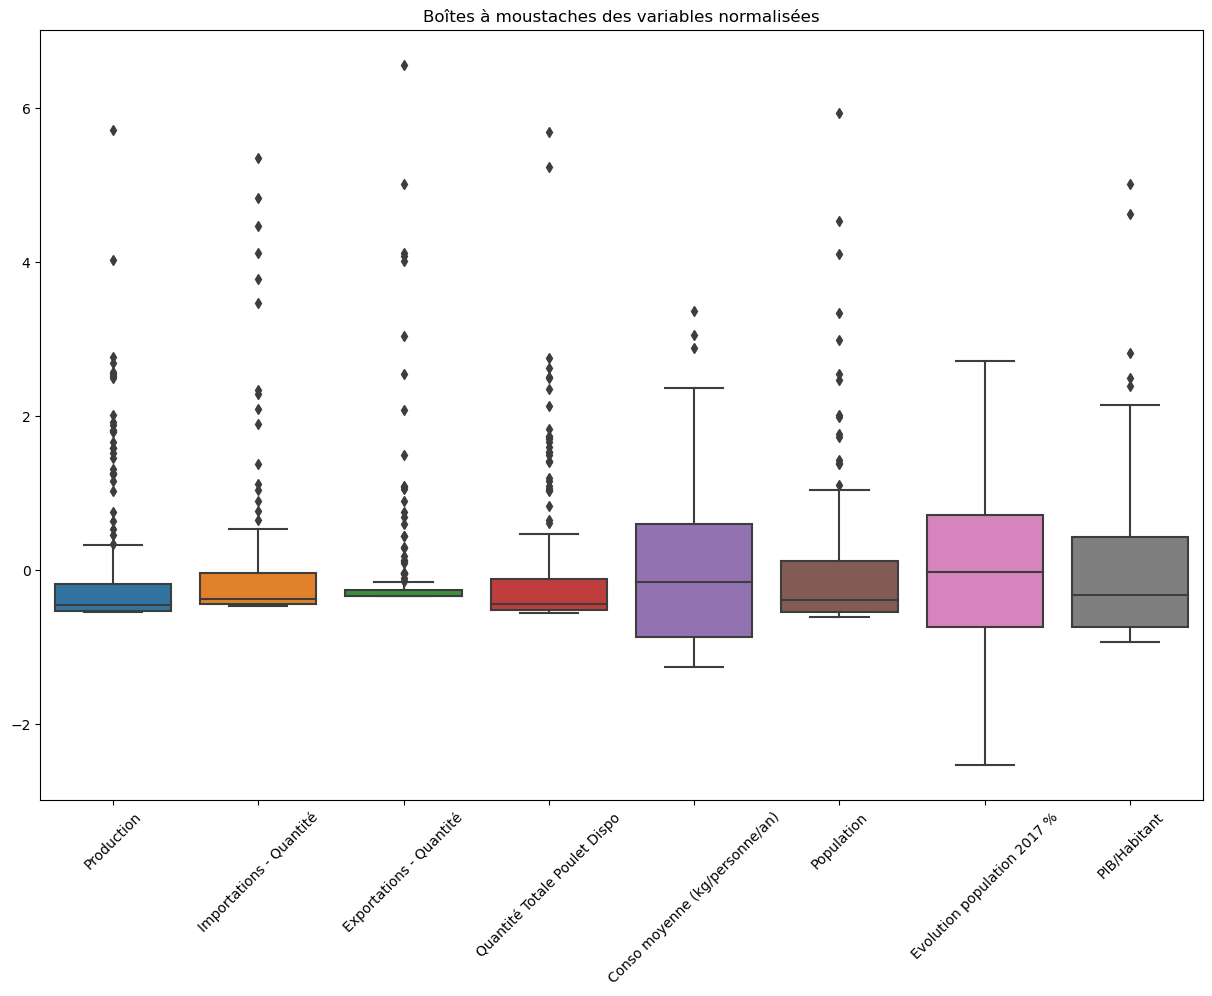

In [70]:
# Boîtes à moustaches
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_normalized)
plt.title('Boîtes à moustaches des variables normalisées')
plt.xticks(rotation=45)
plt.show()

In [71]:
# Identification des valeurs aberrantes (selon le critère > 3 écarts types à la moyenne)
aberrant_indices_raw = np.where(np.abs(df_to_normalize - np.mean(df_to_normalize)) > 3 * np.std(df_to_normalize))
aberrant_rows = aberrant_indices_raw[0]

# Afficher les lignes correspondant aux valeurs aberrantes dans le DataFrame original
aberrant_df = df_poulet.iloc[aberrant_rows]
print(aberrant_df)


                                                      Production  \
Zone                                                               
Allemagne                                           1.514000e+09   
Allemagne                                           1.514000e+09   
Arabie saoudite                                     6.160000e+08   
Bangladesh                                          2.490000e+08   
Belgique                                            4.630000e+08   
Chine - RAS de Hong-Kong                            2.400000e+07   
Chine - RAS de Hong-Kong                            2.400000e+07   
Chine - RAS de Macao                                3.000000e+06   
France                                              1.750000e+09   
Fédération de Russie                                4.444000e+09   
Fédération de Russie                                4.444000e+09   
Indonésie                                           2.301000e+09   
Israël                                          

C:\Users\33621\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


# Calcul des composantes principales

In [2]:
df_normalized

NameError: name 'df_normalized' is not defined

In [72]:
# ACP
pca = PCA(svd_solver='full')
coord = pca.fit_transform(df_normalized) # ligne=individus et colonne=composantePrincipale

In [73]:
# Nombre de composantes principales de l'ACP (pas encore déf)
print("Nombre de composantes principales:", pca.n_components_)

Nombre de composantes principales: 8


In [74]:
# Les variances expliquées  (Valeurs propres)
print("Variance expliquée:", pca.explained_variance_)

Variance expliquée: [3.25906235 1.84019328 0.85016058 0.75344352 0.55222483 0.50100319
 0.28986098 0.00436573]


In [75]:
# Les proportions variances expliquées 
print("Proportion de variance expliquée:", pca.explained_variance_ratio_)

Proportion de variance expliquée: [0.40483665 0.22858651 0.10560588 0.09359181 0.06859668 0.06223399
 0.03600617 0.00054231]


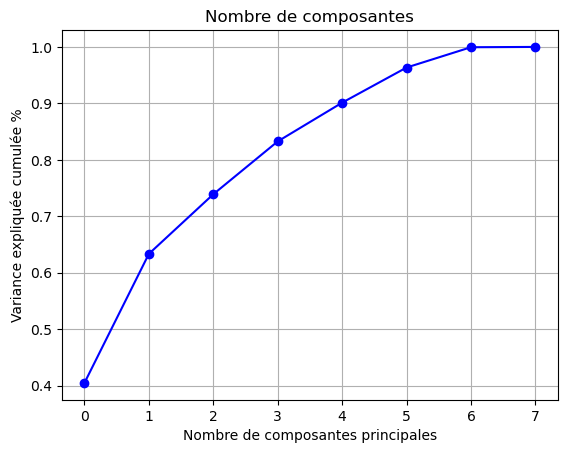

In [76]:
# Graphique de la variance expliquée cumulée pour déterminer le nombre de composantes
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_variance_ratio, marker='o', linestyle='-', color='b')
plt.xlabel('Nombre de composantes principales')
plt.ylabel('Variance expliquée cumulée %')
plt.title('Nombre de composantes')
plt.grid(True)
plt.show()

In [77]:
# pca définir les composantes principales
pca = PCA(n_components=4).fit(df_normalized) # Je choisis la composantes apres 80 % 
eigval = pca.explained_variance_  # les valeurs propres de l'ACP
coord = pca.fit_transform(df_normalized)

In [78]:
# Nombre de composantes / variables
p = len(eigval)

# Calcul des seuils pour le test des bâtons brisés
bs = 1/np.arange(p, 0, -1)
bs = np.cumsum(bs)
bs = bs[::-1] / bs[-1]  # Normalisation pour correspondre à la somme des valeurs propres

# Affichage des valeurs propres et des seuils dans un DataFrame pour comparaison
resultats_batons_brises = pd.DataFrame({'Val.Propre': eigval, 'Seuils': bs[:len(eigval)]})

print(resultats_batons_brises)

   Val.Propre  Seuils
0    3.259062    1.00
1    1.840193    0.52
2    0.850161    0.28
3    0.753444    0.12


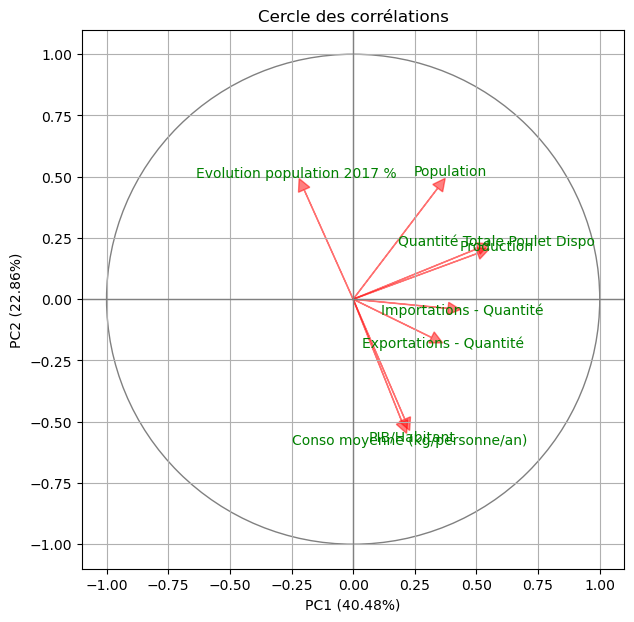

In [79]:
# Création du cercle des corrélations
fig, ax = plt.subplots(figsize=(7, 7))
circle = plt.Circle((0, 0), 1, color='gray', fill=False) # Cerlce de centre 0,0 de rayon 1
ax.add_artist(circle) # Ajout du cerlce à la figure

# Calcul des pourcentages de variance expliquée
pc1_variance = pca.explained_variance_ratio_[0] * 100  # Pourcentage pour PC1
pc2_variance = pca.explained_variance_ratio_[1] * 100  # Pourcentage pour PC2

# Ajouter les vecteurs au cercle des corrélations
for i in range(len(df_normalized.columns)):
    plt.arrow(0, 0, pca.components_.T[i, 0], pca.components_.T[i, 1],
              head_width=0.05, head_length=0.05, color='r',
              alpha=0.5) # Ajout des fleches qui représente la corrélation entre variable originale avec la composante principale 
    plt.text(pca.components_.T[i, 0] * 1.15,
             pca.components_.T[i, 1] * 1.15, 
             df_normalized.columns[i], color='g', ha='center',
             va='center') # Ajout du nom de la variable originale sur la fleche

# Définir les limites et les étiquettes du graphique
plt.xlim(-1.1, 1.1) # limite dde X
plt.ylim(-1.1, 1.1) # Limite de y
plt.xlabel(f'PC1 ({pc1_variance:.2f}%)') # % Variance expliquée PC1
plt.ylabel(f'PC2 ({pc2_variance:.2f}%)') # % Variance expliquée PC2
plt.title('Cercle des corrélations')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.grid()

# Afficher le graphique
plt.show()


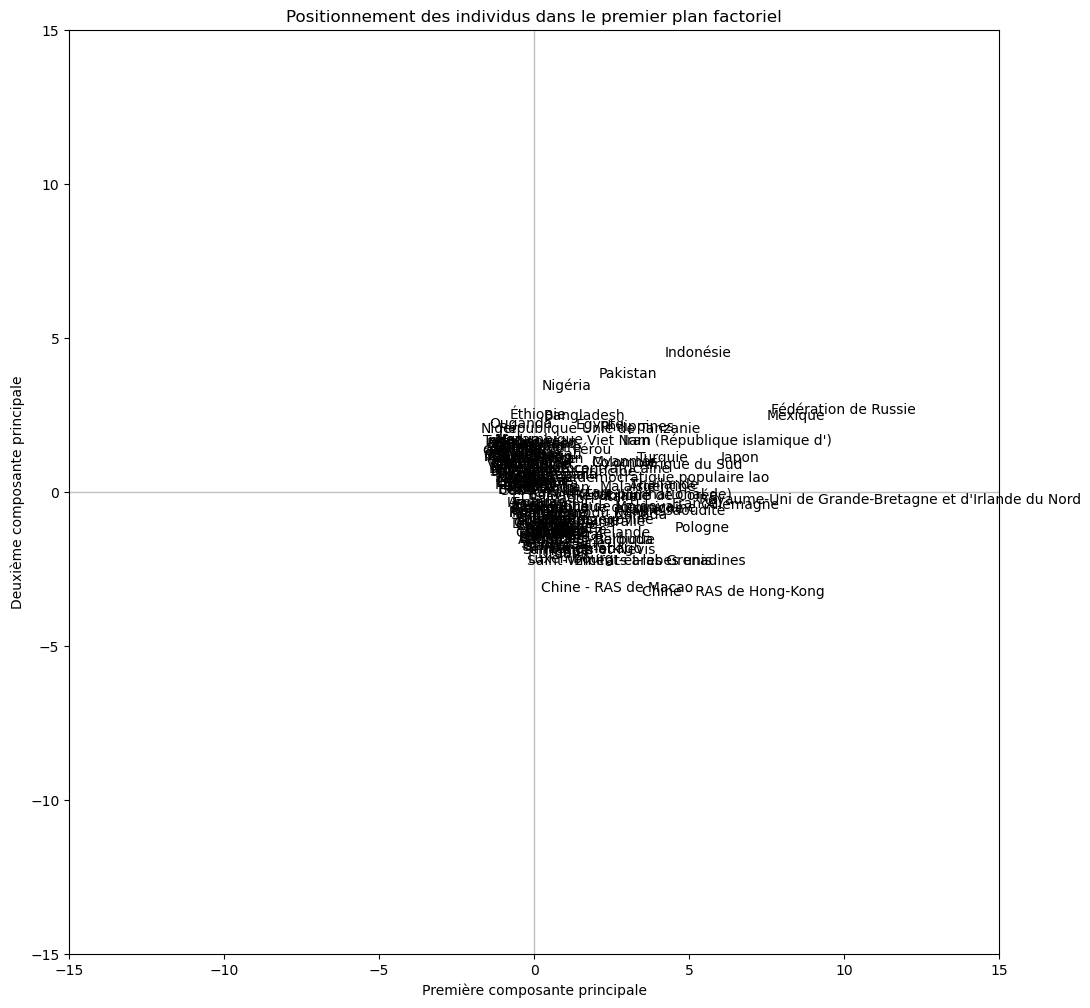

In [80]:
# Création de la figure
fig, ax = plt.subplots(figsize=(12, 12))

# Positionnement des individus dans le premier plan
# Les coordonnées des individus sont dans les deux premières colonnes de `coord`
for i, (x, y) in enumerate(coord[:, :2]):
    plt.annotate(df_poulet.index[i], (x, y))

# Ajout des axes avec une ligne à zéro pour mieux visualiser le graphique
ax.axhline(0, color='silver', linestyle='-', linewidth=1)
ax.axvline(0, color='silver', linestyle='-', linewidth=1)

# Limites des axes
ax.set_xlim(-15, 15)  # ajustez ces valeurs selon vos données
ax.set_ylim(-15, 15)  # ajustez ces valeurs selon vos données

# Titre et étiquettes des axes
plt.title("Positionnement des individus dans le premier plan factoriel")
plt.xlabel("Première composante principale")
plt.ylabel("Deuxième composante principale")

# Affichage du graphique
plt.show()

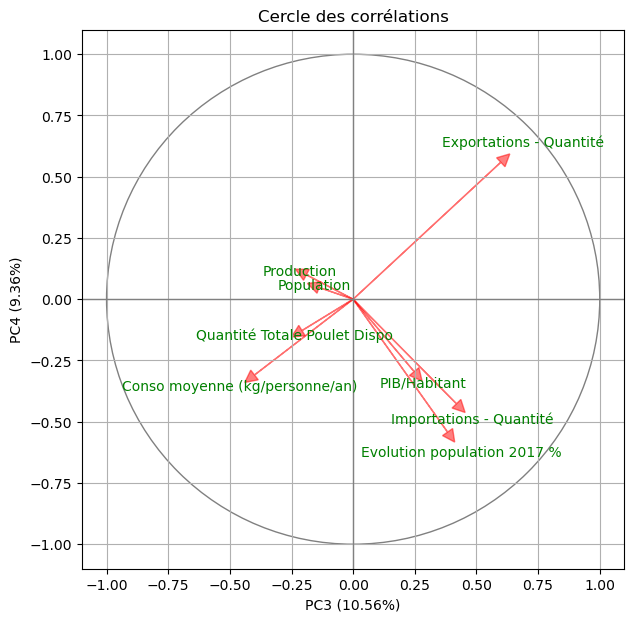

In [81]:
# Création du cercle des corrélations
fig, ax = plt.subplots(figsize=(7, 7))
circle = plt.Circle((0, 0), 1, color='gray', fill=False)
ax.add_artist(circle)

# Calcul des pourcentages de variance expliquée
pc3_variance = pca.explained_variance_ratio_[2] * 100  # Pourcentage pour PC3
pc4_variance = pca.explained_variance_ratio_[3] * 100  # Pourcentage pour PC4

# Ajouter les vecteurs au cercle des corrélations
for i in range(len(df_normalized.columns)):
    plt.arrow(0, 0, pca.components_.T[i, 2], pca.components_.T[i, 3], head_width=0.05, head_length=0.05, color='r', alpha=0.5)
    plt.text(pca.components_.T[i, 2] * 1.15, pca.components_.T[i, 3] * 1.15, df_normalized.columns[i], color='g',
             ha='center', va='center')

# Définir les limites et les étiquettes du graphique
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel(f'PC3 ({pc3_variance:.2f}%)')
plt.ylabel(f'PC4 ({pc4_variance:.2f}%)')
plt.title('Cercle des corrélations')
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)
plt.grid()

# Afficher le graphique
plt.show()


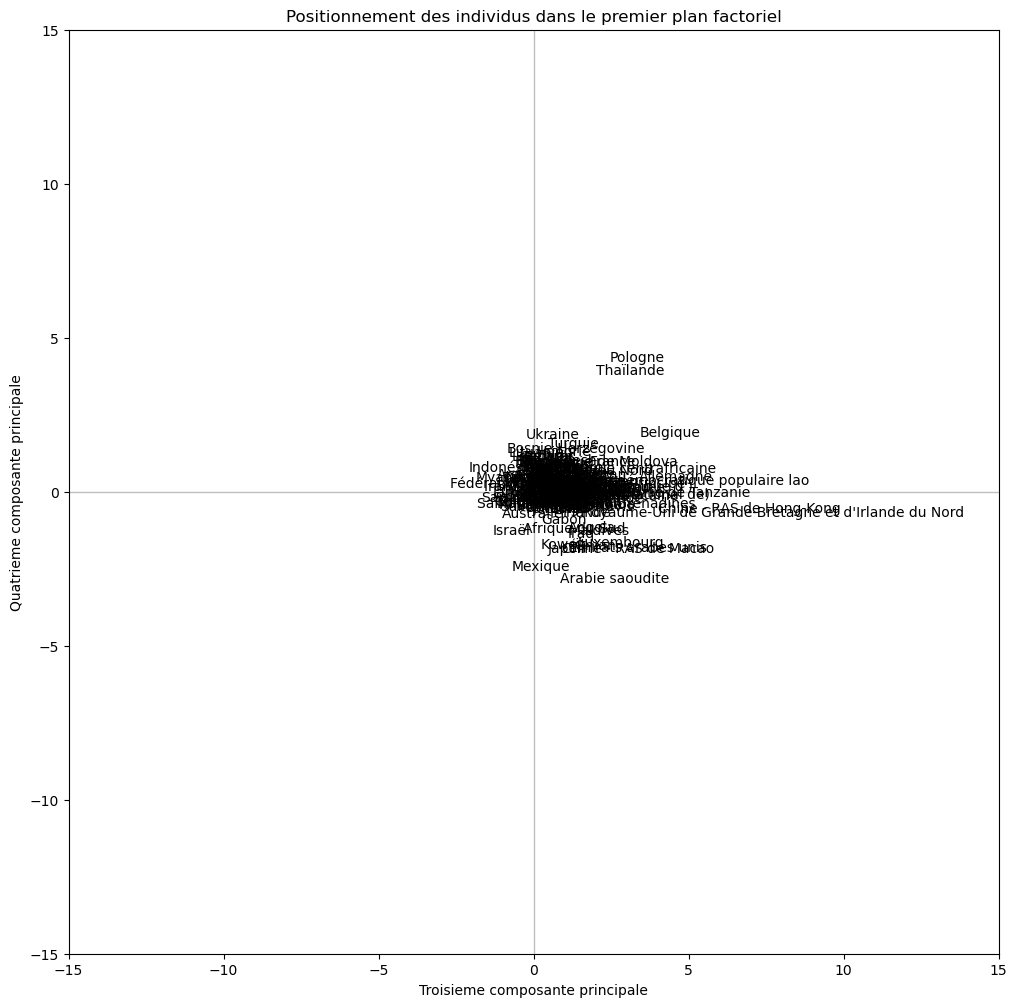

In [82]:
# Création de la figure
fig, ax = plt.subplots(figsize=(12, 12))

# Positionnement des individus dans le premier plan
# Les coordonnées des individus sont dans les deux premières colonnes de `coord`
for i, (x, y) in enumerate(coord[:, 2:]):
    plt.annotate(df_poulet.index[i], (x, y))

# Ajout des axes avec une ligne à zéro pour mieux visualiser le graphique
ax.axhline(0, color='silver', linestyle='-', linewidth=1)
ax.axvline(0, color='silver', linestyle='-', linewidth=1)

# Limites des axes
ax.set_xlim(-15, 15)  # ajustez ces valeurs selon vos données
ax.set_ylim(-15, 15)  # ajustez ces valeurs selon vos données

# Titre et étiquettes des axes
plt.title("Positionnement des individus dans le premier plan factoriel")
plt.xlabel("Troisieme composante principale")
plt.ylabel("Quatrieme composante principale")

# Affichage du graphique
plt.show()

In [83]:
# Calcul des carrés des distances des pays au centre de gravité
di = np.sum(coord**2, axis=1)

# Création d'un DataFrame pour les contributions en utilisant l'index de df_normalized
contributions_df = pd.DataFrame({'d_i': di}, index=df_normalized.index).sort_values(by='d_i', ascending=False).head(10)

# Affichage du DataFrame
contributions_df

,d_i
Zone,
Fédération de Russie,72.077534
Mexique,68.690217
Pologne,46.138956
Allemagne,42.842329
Indonésie,41.868861
Japon,41.241931
Chine - RAS de Hong-Kong,39.717979
Royaume-Uni de Grande-Bretagne et d'Irlande du Nord,31.401051
Thaïlande,28.076706


In [84]:
# Préparation des données pour le calcul de COS2
cos2 = coord ** 2  # carré des coordonnées pour chaque individu (Pays)

# Division par di pour obtenir COS2
# Assurer que di est sous forme de colonne
di_reshape = di.reshape(-1, 1) 
cos2 = cos2 / di_reshape # Diviser les carrés des coordonnées par les carrés des distances di

# Création d'un DataFrame pour les COS2
# Utilisation de l'index de df_normalized pour les pays
cos2_df = pd.DataFrame(index=df_normalized.index)
for j in range(p):  # 'p' doit être défini comme le nombre de dimensions/composantes principales
    cos2_df[f'COS2_{j+1}'] = cos2[:, j]  # Ajout des COS2 pour chaque axe

# Affichage du DataFrame
print(cos2_df)

                       COS2_1    COS2_2    COS2_3    COS2_4
Zone                                                       
Afghanistan          0.379944  0.557344  0.062630  0.000082
Afrique du Sud       0.829550  0.040802  0.008796  0.120852
Albanie              0.320271  0.233239  0.139188  0.307302
Algérie              0.271557  0.718410  0.008115  0.001918
Allemagne            0.720086  0.006649  0.270040  0.003225
...                       ...       ...       ...       ...
Égypte               0.286074  0.660691  0.038085  0.015150
Émirats arabes unis  0.135999  0.453204  0.105116  0.305680
Équateur             0.637649  0.219331  0.128835  0.014184
Éthiopie             0.098188  0.886440  0.013560  0.001812
Îles Salomon         0.657147  0.260909  0.078673  0.003271

[160 rows x 4 columns]


In [85]:
#vérifions la théorie ou la somme en ligne des cos2 = 1
print(np.sum(cos2,axis=1))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [86]:
# le champ components de l'objet PCA en affichant les valeurs propres
print(pca.components_)

[[ 0.50484371  0.38518909  0.3176925   0.5054436   0.19826631  0.34301064
  -0.1987636   0.20949374]
 [ 0.18723907 -0.03751909 -0.15611223  0.20722857 -0.50112964  0.45345271
   0.44674134 -0.48978673]
 [-0.18964762  0.41894997  0.5987712  -0.20742437 -0.40003951 -0.13823774
   0.38291563  0.24738072]
 [ 0.09961445 -0.42661997  0.55902916 -0.12793479 -0.30921662  0.04806721
  -0.54228077 -0.29529248]]


In [87]:
# Racine carrée des valeurs propres pour chaque composantes
sqrt_eigval = np.sqrt(eigval) # Calcul racince carré des valeurs propres
sqrt_eigval 

array([1.80528733, 1.35653724, 0.92204153, 0.86801124])

In [88]:
#corrélation des variables avec les axes
# Initialisation de la matrice des corrélations
corvar = np.zeros((8, 4)) #Stocker les coeff de corrélationentre chaque variable

# Calcul de la corrélation des variables avec les axes
for k in range(4):  # Parcours les quatre premières composantes principales
    corvar[:, k] = pca.components_[k, :] * sqrt_eigval[k] # Multiplie les coef de composante principale par la racine carré de la valeur propre correspondante

# Affichage de la matrice des corrélations variables x facteurs
print(corvar)

[[ 0.91138795  0.25399677 -0.17486298  0.08646646]
 [ 0.69537699 -0.05089604  0.38628927 -0.37031093]
 [ 0.57352625 -0.21177205  0.55209191  0.48524359]
 [ 0.91247094  0.28111327 -0.19125388 -0.11104884]
 [ 0.35792767 -0.67980102 -0.36885305 -0.2684035 ]
 [ 0.61923276  0.61512549 -0.12746093  0.04172288]
 [-0.35882542  0.60602126  0.35306411 -0.4707058 ]
 [ 0.37819639 -0.66441393  0.2280953  -0.25631719]]


In [89]:
# Création d'un DataFrame avec les composantes principales
df_pca_components = pd.DataFrame(data=coord[:, :4], index=df_normalized.index, columns=['PC1', 'PC2', 'PC3', 'PC4'])

# Affichage du DataFrame avec les composantes principales
print(df_pca_components)


                          PC1       PC2       PC3       PC4
Zone                                                       
Afghanistan         -1.250609  1.514689  0.507755 -0.018399
Afrique du Sud       3.428707  0.760411 -0.353065 -1.308687
Albanie             -0.766461 -0.654081 -0.505280  0.750782
Algérie             -0.684307  1.113028  0.118298  0.057509
Allemagne            5.554292 -0.533732  3.401341  0.371717
...                       ...       ...       ...       ...
Égypte               1.346244  2.045899 -0.491207 -0.309803
Émirats arabes unis  1.286942 -2.349297  1.131426 -1.929411
Équateur            -0.593858  0.348291 -0.266937 -0.088572
Éthiopie            -0.793956  2.385570  0.295055  0.107863
Îles Salomon        -1.633708  1.029408  0.565271 -0.115261

[160 rows x 4 columns]


In [90]:
# Exporter le df pour CAH ey K-means
df_pca_components.to_csv('df_pca_components.csv', index=True)  

In [91]:
# Exporter le df_poulet pour CAH ey K-means
df_poulet.to_csv('df_poulet.csv', index=True)  